<a href="https://colab.research.google.com/github/TanyaKumari0204/Machine-Learning-Projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prdict at what selling  price car should be sold.

Car data->Data preprocessing ->Train test split->Linear and lasso regression->(Since particular value is predicted_->Trained model->Prediction

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [48]:
car_dataset=pd.read_csv('/content/car data.csv')

In [49]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [50]:
car_dataset.shape

(301, 9)

In [51]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [52]:
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [53]:
#Checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [54]:
#Data encoding covert text in numbers
car_dataset.replace({'Fuel_Type':{'Petrol':0,"Diesel":1,"CNG":2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0,"Individual":1}},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0,"Automatic":1}},inplace=True)

/tmp/ipython-input-2800037738.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,"Diesel":1,"CNG":2}},inplace=True)
/tmp/ipython-input-2800037738.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,"Individual":1}},inplace=True)
/tmp/ipython-input-2800037738.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fal

In [55]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [56]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dataset['Selling_Price']

In [57]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [58]:
X_train.shape,X_test.shape,X.shape

((240, 7), (61, 7), (301, 7))

In [59]:
print(X)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]


In [60]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Model training

In [61]:
linear_reg_model=LinearRegression()

In [62]:
linear_reg_model.fit(X_train,Y_train)


LinearRegression()

In [63]:
training_data_prediction=linear_reg_model.predict(X_train)


rsq error

In [64]:
error_score=metrics.r2_score(Y_train,training_data_prediction)

In [66]:
print(error_score)

0.8838169193709796


In [67]:
testing_data_prediction=linear_reg_model.predict(X_test)


In [70]:
error_score1=metrics.r2_score(Y_test,testing_data_prediction)

In [71]:
print(error_score1)

0.8401532365377697


Visula actual and predicted price

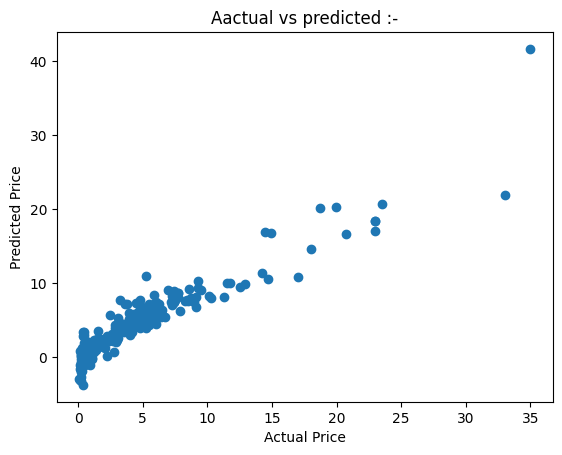

In [72]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Aactual vs predicted :-")
plt.show()

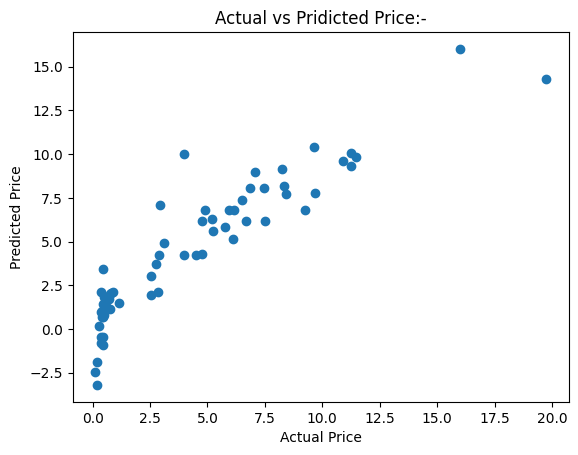

In [74]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Pridicted Price:-")
plt.show()

When there is direct relation:-if one inc then other too,them linear reg is used else other reg

In [75]:
Lasso_reg_model=Lasso()

In [76]:
Lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [77]:
training_data_predict=Lasso_reg_model.predict(X_train)


In [78]:
error2=metrics.r2_score(Y_train,training_data_predict)

In [79]:
print(error2)

0.843587395258283


In [80]:
testing_data_predict=Lasso_reg_model.predict(X_test)


In [81]:
error3=metrics.r2_score(Y_test,testing_data_predict)

In [82]:
print(error3)

0.8497457570738539


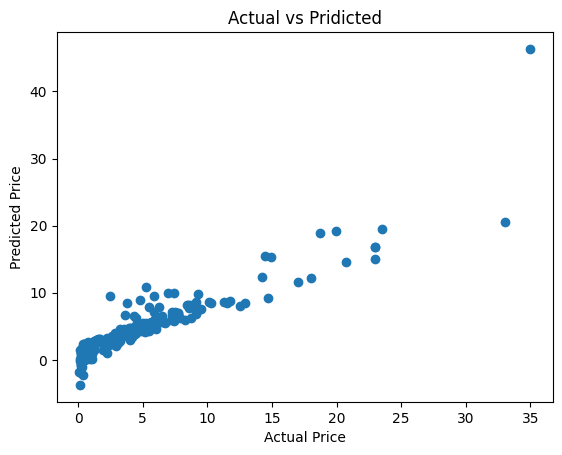

In [84]:
plt.scatter(Y_train,training_data_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Pridicted")
plt.show()

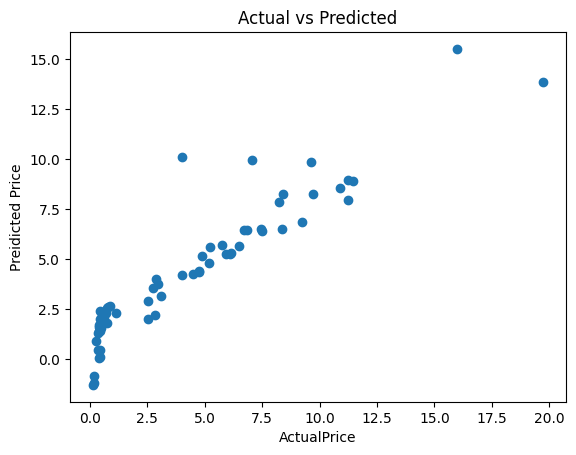

In [85]:
plt.scatter(Y_test,testing_data_predict)
plt.xlabel("ActualPrice")
plt.ylabel("Preidicted Price")
plt.title("Actual vs Predicted")
plt.show()

Lasso better than linear(better graph)